In [ ]:
import datetime
import pytz
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.ticker as mpticker
import pandas as pd
import numpy as np

In [ ]:
def get_optimum_clusters(df, saturation_point=0.05):
    '''
    :param df: dataframe
    :param saturation_point: The amount of difference we are willing to detect
    :return: clusters with optimum K centers
    This method uses elbow method to find the optimum number of K clusters
    We initialize different K-means with 1..10 centers and compare the inertias
    If the difference is no more than saturation_point, we choose that as K and move on
    '''

    wcss = []
    k_models = []

    size = min(11, len(df.index))
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)

    # Compare differences in inertias until it's no more than saturation_point
    optimum_k = len(wcss)-1
    for i in range(0, len(wcss)-1):
        diff = abs(wcss[i+1] - wcss[i])
        if diff < saturation_point:
            optimum_k = i
            break

    print("Optimum K is " + str(optimum_k + 1))
    optimum_clusters = k_models[optimum_k]

    return optimum_clusters

In [ ]:
data = pd.read_csv('btc_df.csv')
# data["Time"] = [d.timestamp() for d in data.index]
data

,dateTime,open,high,low,close,volume,closeTime,quoteAssetVolume,numberOfTrades,takerBuyBaseVol,takerBuyQuoteVol,ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1931,2022-11-30,16442.91,17249.00,16428.30,17163.64,303019.807190,2022-11-30 23:59:59.999,5.123595e+09,6519330,151764.572850,2.566042e+09,0
1932,2022-12-01,17165.53,17324.00,16855.01,16977.37,232818.182180,2022-12-01 23:59:59.999,3.972607e+09,5097720,116018.888670,1.979693e+09,0
1933,2022-12-02,16978.00,17105.73,16787.85,17092.74,202372.206200,2022-12-02 23:59:59.999,3.432385e+09,4305515,99556.141050,1.688510e+09,0
1934,2022-12-03,17092.13,17188.98,16858.74,16885.20,154542.573060,2022-12-03 23:59:59.999,2.622504e+09,3308694,76214.566040,1.293351e+09,0


In [ ]:
data = data.drop(columns=['closeTime','quoteAssetVolume','numberOfTrades','takerBuyBaseVol','takerBuyQuoteVol','ignore'])
data

In [ ]:
data['dateTime'] = pd.to_datetime(data['dateTime'])

data = data.drop(range(0,1700))

In [ ]:
data

,dateTime,open,high,low,close,volume
1700,2022-04-13,40074.95,41561.31,39588.54,41147.79,41342.27254
1701,2022-04-14,41147.78,41500.00,39551.94,39942.38,36807.01401
1702,2022-04-15,39942.37,40870.36,39766.40,40551.90,24026.35739
1703,2022-04-16,40551.90,40709.35,39991.55,40378.71,15805.44718
1704,2022-04-17,40378.70,40595.67,39546.17,39678.12,19988.49259
...,...,...,...,...,...,...
1931,2022-11-30,16442.91,17249.00,16428.30,17163.64,303019.80719
1932,2022-12-01,17165.53,17324.00,16855.01,16977.37,232818.18218
1933,2022-12-02,16978.00,17105.73,16787.85,17092.74,202372.20620
1934,2022-12-03,17092.13,17188.98,16858.74,16885.20,154542.57306


Optimum K is 10
Optimum K is 10


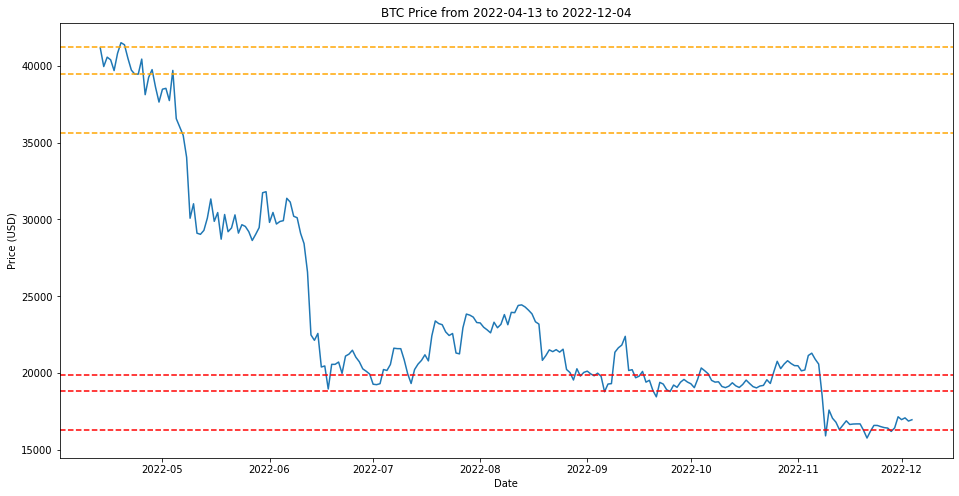

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(data['dateTime'], data['close'])
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.title('BTC Price from ' + str(min(data['dateTime']))[:10] + ' to ' + str(max(data['dateTime']))[:10])

lod, hod = 0, 0

lows = pandas.DataFrame(data=data, index=data.index, columns=["low"])
highs = pandas.DataFrame(data=data, index=data.index, columns=["high"])

low_clusters = get_optimum_clusters(lows)
low_centers = low_clusters.cluster_centers_
low_centers = numpy.sort(low_centers, axis=0)

high_clusters = get_optimum_clusters(highs)
high_centers = high_clusters.cluster_centers_
high_centers = numpy.sort(high_centers, axis=0)

# print(data)
# print(low_centers)
# print(high_centers)

for low in low_centers[:2]:
    plt.axhline(low[0], color='red', label='l', ls='--')


for high in high_centers[-3:]:
    plt.axhline(high[0], color='orange', ls='--')

plt.show()